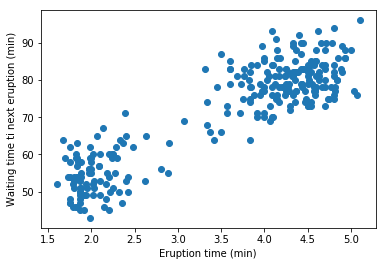

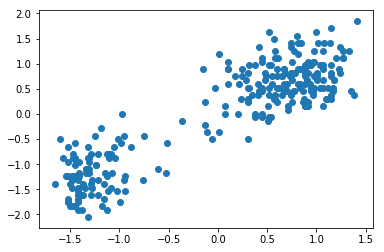

Number centroids: 5
[[ 0.74189263  0.81819999]
 [-0.60370444 -1.09779681]
 [ 0.97625298  0.74450781]
 [-1.45249268 -0.87672026]
 [-1.46653674 -0.87672026]]
[20.13889774  9.69246429 14.46168587  6.75591647  6.11055006]


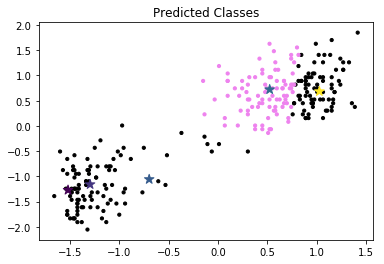

In [4]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random
data = np.loadtxt('Oldfaithful.txt', skiprows=0)[:, :]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()
n=np.mean(data, axis=0)
data=(data-n)/(np.mean((data-n)**2, axis=0))**(1/2)    
plt.scatter(*data.T)
plt.show()
N=int(input("Number centroids: "))
centroids=data[np.random.choice(np.arange(len(data)), N, False)]
#co=(len(data))/2
co=int(data.size/2)
print(centroids)
def getlabels(pt, centroids, co, N):
    a=np.vstack(pt-centroids[i] for i in range(N))
    b=np.linalg.norm(a,axis=1)
    dist=b.reshape(N,co).transpose()
    return np.argmin(dist, axis=1)
def kmeans(data,centroids,diagnosis, co, N):
    labels=getlabels(data, centroids, co, N)
    #newcentoids=centroids
    d=1
    step=0
    while d>diagnosis:
        newcentroids=centroids
        for i in range(N): centroids[i]=np.sum(data[labels==i],axis=0)/np.sum(labels==i)
        labels=getlabels(data, centroids, co, N)    
        d=max(np.linalg.norm(centroids[i]-newcentroids[i]) for i in range(N))
        #step+=1
   # centroids=newcentroids
    distortion=np.array([np.sum((np.linalg.norm(data[labels==i]-centroids[i]))**2) for i in range(N)])
    return centroids, distortion    
centroids, d=kmeans(data,centroids,0.00000001, co, N)
print(d)
labels = getlabels(data, centroids, co, N)
import matplotlib.pyplot as plt
%matplotlib inline
col=lambda: random.randint(0, 255)
labels = getlabels(data, centroids, co, N)
#plt.scatter(*data.T, c=np.where(labels, "col() for i in range(N)"), s=10)
plt.scatter(*data.T, c=np.where(labels, "black", "violet"), s=10)
plt.scatter(*centroids.T, c=[col() for i in range(N)], s=100, marker='*')
plt.title('Predicted Classes')
plt.show()

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
plt.figure(figsize=(6, 4))
digits = load_digits()
digits.images.shape
i=120
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()
#k=10
#kmeans(digits,10)

<Figure size 640x480 with 1 Axes>

[6, 7, 8, 2, 9, 5, 3, 0, 4, 1]


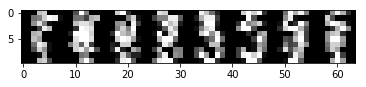

0.20756816917084028
[[176.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0.  55.   2.   0.   3.   0.   0.   2.   6.  20.]
 [  0.  24. 147.   0.   0.   0.   0.   0.   3.   0.]
 [  0.   1.  13. 156.   0.   1.   0.   0.   2.   6.]
 [  2.   0.   0.   0. 165.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   2.   0. 137.   0.   5.   6.   7.]
 [  0.   2.   0.   0.   0.   1. 177.   0.   2.   0.]
 [  0.   0.   4.   6.  11.   0.   0. 170.   3.   8.]
 [  0.  99.   8.   7.   2.   0.   3.   2. 102.   0.]
 [  0.   0.   2.  12.   0.  42.   0.   0.  50. 139.]]
1797.0


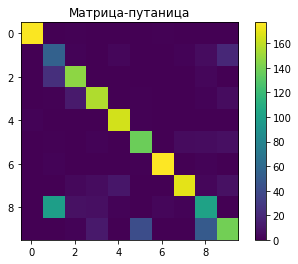

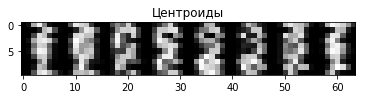

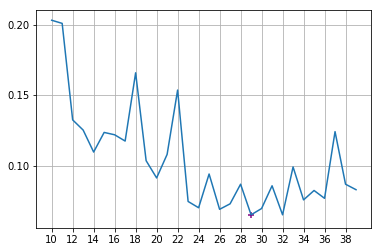

Nопт: 29


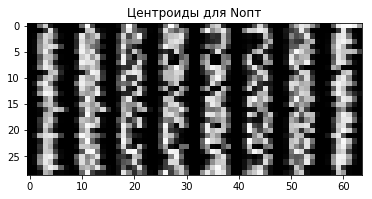

Цифры для Nопт: [9, 8, 5, 2, 0, 7, 0, 1, 2, 9]


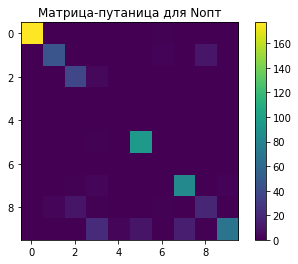

In [17]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def kmeans(data,N,s):
    centrs=data[np.random.choice(np.arange(len(data)), N, False)]
    a=data[:,np.newaxis]-centrs
    dist=np.sqrt(np.sum(np.square(a),axis=-1))
    cldist=np.argmin(dist,axis=1)
    co=np.zeros(len(a[1,:,1])*len(a[:,1,1])*len(a[1,1,:])).reshape(len(a[:,1,1]),len(a[1,:,1]),len(a[1,1,:]))
    co[np.arange(len(a[:,1,1])),cldist,:]=a[np.arange(len(a[:,1,1])),cldist,:]
    ncentrs=((co.sum(axis=0)))/np.bincount(cldist)[:,np.newaxis]+centrs
    st=0
    while(np.array_equal(ncentrs, centrs)==False) and (st<s):
        centrs=ncentrs #getlabels запихнули в kmeans, чтобы не париться
        a=data[:,np.newaxis]-centrs
        dist=np.sqrt(np.sum(np.square(a),axis=-1))
        cldist=np.argmin(dist, axis=1)
        co=np.zeros(len(a[1,:,1])*len(a[:,1,1])*len(a[1,1,:])).reshape(len(a[:,1,1]),len(a[1,:,1]),len(a[1,1,:]))
        co[np.arange(len(a[:,1,1])),cldist,:]=a[np.arange(len(a[:,1,1])),cldist,:]
        ncentrs=((co.sum(axis=0)))/np.bincount(cldist)[:,np.newaxis]+centrs
        st+=1  
    clusters=[data[cldist==kk] for kk in range(len(centrs))] 
    z=np.max(dist[:,cldist])
    return [cldist,centrs]
  
def errorrate(cldist,digits,N):
    c=np.sum([np.sum(np.bincount(digits.target[cldist==i])) for i in range(N)])-np.sum([np.max(np.bincount(digits.target[cldist==m])) for m in range(N)])    
    return c/len(digits.data[:,1])
def confusionmatrix(digits,cldist,labels):
    a=np.zeros(10*max(N,10)).reshape(max(N,10),10)
    b=np.array([np.bincount(digits.target[cldist==q],minlength=10) for q in range(N)]).reshape(N,10)
    for i in range(N): a[labels[i],:]+=b[i,:]
    return a

digits = load_digits()
N=10
s=20
X=np.arange(10,40)
cldist=kmeans(digits.data,N,s)[0]
centrs=kmeans(digits.data,N,s)[1]
labels=[np.argmax(np.bincount(digits.target[cldist==r])) for r in range(N)]
print(labels) #1
plt.imshow(np.array([digits.images[i] for i in labels]).reshape(N,64), cmap='gray') 
plt.show()
plt.show()
print(errorrate(cldist,digits,N))   #2
print(confusionmatrix(digits,cldist,labels)) #3
print(np.sum(confusionmatrix(digits,cldist,labels)))   
plt.imshow(confusionmatrix(digits,cldist,labels))
plt.title('Матрица-путаница')
plt.colorbar()
plt.show()
plt.title('Центроиды')
plt.imshow(centrs, cmap='gray')   
plt.show()    
plt.grid()
plt.yticks(np.arange(0,1.2,0.05))
plt.xticks(np.arange(2,40,2))
v=[errorrate(kmeans(digits.data,i,s)[0],digits,i) for i in X]
plt.plot(X,v)
plt.scatter(np.argmin(v)+X[0],np.min(v), color='purple',s=40,marker='+') #4
plt.show()
centrs=kmeans(digits.data,np.argmin(v)+X[0],s)[1]
print('Nопт:',np.argmin(v)+X[0]) #5
plt.title('Центроиды для Nопт')
plt.imshow(centrs, cmap='gray')
plt.show()    
cldist=kmeans(digits.data,np.argmin(v)+X[0],s)[0]
labels=[np.argmax(np.bincount(digits.target[cldist==j])) for j in range(N)]
print('Цифры для Nопт:',labels)
plt.imshow(confusionmatrix(digits,cldist,labels))
plt.title('Матрица-путаница для Nопт')
plt.colorbar()
plt.show()